In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
import copy

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer 
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS

from bs4 import BeautifulSoup    
from nltk.stem import WordNetLemmatizer
from math import sqrt

from nltk.stem.porter import PorterStemmer
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
import copy
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer 
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS

from bs4 import BeautifulSoup    
from nltk.stem import WordNetLemmatizer
from math import sqrt

from nltk.stem.porter import PorterStemmer
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chall\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chall\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


C:\Users\chall\Anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [2]:
#importing positive words and negative words
dfn= pd.read_csv('negative_words.txt',header=None)#data_frame
np_neg = np.array(dfn)
dfp= pd.read_csv('positive_words.txt',header=None)#data_frame
np_pos = np.array(dfp)

In [3]:
print(np_neg)
len(np_neg)

[['2-faced']
 ['2-faces']
 ['abnormal']
 ...
 ['zealous']
 ['zealously']
 ['zombie']]


4783

In [4]:
print(np_pos)
len(np_pos)

[['a+']
 ['abound']
 ['abounds']
 ...
 ['zenith']
 ['zest']
 ['zippy']]


2006

## Stop words and working with negative words
some extremely common words which have a little effect in the sentiment of output of machine learning algorithm are called stop words. 
ex:- a,this,that etc
nltk stop words concider not also as a stop word.ex:-Not good and good will be concidered the same. So, neg tagging is used. given below is a demonstration of the cleaning process.

In [21]:
review = "I didn't like this movie . It was bad ."

In [16]:
mark_negation(review)

['I',
 "didn't",
 'like_NEG',
 'this_NEG',
 'movie_NEG',
 '.',
 'It',
 'was',
 'bad',
 '.']

In [25]:
#negative marking mark_pos
neg_stopwords = list(str(i+'_neg') for i in stopwords.words('english') )
sw = list(copy.deepcopy(neg_stopwords))
for i in list(stopwords.words('english')):

    sw.append(i)
#cleaning the  data
def clean(s):
    review = copy.deepcopy(s)
    
    review = mark_negation(review.split())
    review = ' '.join(review)
    #print(review)
    review = re.sub('[^a-zA-Z_+]', ' ', review)
    #print(review)
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    #print(review)
    review = [ps.stem(word) for word in review if not word in sw]
#stop words are not removed because some words like not change the entire meaning of sentense
    review = ' '.join(review)
    return review

In [27]:
#cleaning positive wordsa array
pos_clean_list = [] 
for i in np_pos:
    pos_clean_list.append(clean(str(i)))

In [28]:
#cleaning negative words array
neg_clean_list = [] 
for i in np_neg:
    neg_clean_list.append(clean(str(i)))

# Working with the data set  Data set description


In [29]:
#importing the corpus dataset downloaded from kaggle
dataset = pd.read_csv('train.tsv', delimiter = '\t', quoting = 3)#quoting to ignore any ""(double quotes)
train_data = copy.deepcopy(dataset)

In [30]:
dataset.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [31]:
dataset.info()# create new column with if and for loop with the Sentiment Phrase column

print("\n\nSentiment description: \n0 - negative\n1 - somewhat negative\n2 - neutral\n3 - somewhat positive\n4 - positive\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
PhraseId      156060 non-null int64
SentenceId    156060 non-null int64
Phrase        156060 non-null object
Sentiment     156060 non-null int64
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


Sentiment description: 
0 - negative
1 - somewhat negative
2 - neutral
3 - somewhat positive
4 - positive



# create new Sentiment Phrase column and append it to dataframe



In [32]:
Sentiment_words=[]
for row in train_data['Sentiment']:
    if row ==0:
        Sentiment_words.append('negative')
    elif row == 1:
        Sentiment_words.append('neutral')
    elif row == 2:
        Sentiment_words.append('somewhat negative')
    elif row == 3:
        Sentiment_words.append('somewhat positive')
    elif row == 4:
        Sentiment_words.append('positive')
    else:
        Sentiment_words.append('Failed')
train_data['Sentiment_words'] = Sentiment_words

In [33]:
train_data.head()

,PhraseId,SentenceId,Phrase,Sentiment,Sentiment_words
0,1,1,A series of escapades demonstrating the adage ...,1,neutral
1,2,1,A series of escapades demonstrating the adage ...,2,somewhat negative
2,3,1,A series,2,somewhat negative
3,4,1,A,2,somewhat negative
4,5,1,series,2,somewhat negative


In [34]:
#counting values of each sentiment
word_count=pd.value_counts(train_data['Sentiment_words'].values, sort=False)
word_count

somewhat positive    32927
somewhat negative    79582
neutral              27273
positive              9206
negative              7072
dtype: int64

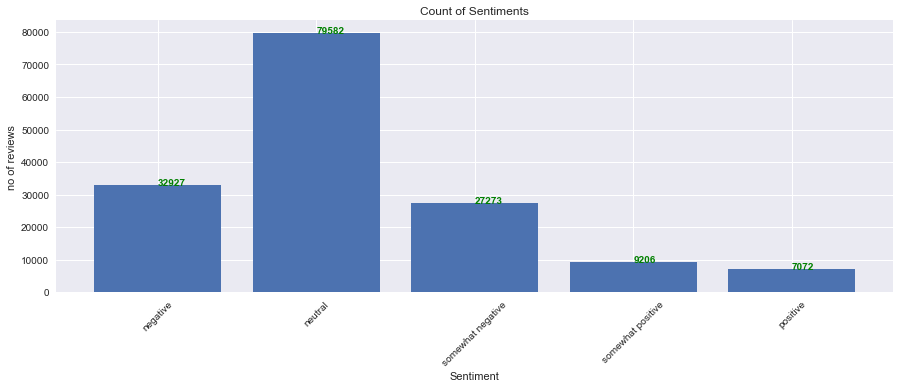

In [35]:
Index = [1,2,3,4,5]
plt.figure(figsize=(15,5))
plt.bar(Index,word_count,color = 'blue')
plt.xticks(Index,['negative','neutral','somewhat negative','somewhat positive','positive'],rotation=45)
plt.ylabel('no of reviews')
plt.xlabel('Sentiment')
plt.title('Count of Sentiments')
plt.bar(Index, word_count)
for a,b in zip(Index, word_count):
    plt.text(a, b, str(b) ,color='green', fontweight='bold')


In [36]:
#cleaning data set from kaggle
dataset_clean_list = []
for i in range(0, 156060):
    dataset_clean_list.append(clean(dataset['Phrase'][i]))
    

# The data looks like the following after cleaning

In [142]:
dataset_clean_list

['seri escapad demonstr adag good goos also good gander occasion amus none amount much stori',
 'seri escapad demonstr adag good goos',
 'seri',
 '',
 'seri',
 'escapad demonstr adag good goos',
 '',
 'escapad demonstr adag good goos',
 'escapad',
 'demonstr adag good goos',
 'demonstr adag',
 'demonstr',
 'adag',
 '',
 'adag',
 'good goos',
 '',
 'good goos',
 '',
 'good goos',
 '',
 'good goos',
 'good',
 'goos',
 '',
 'goos',
 'goos',
 'also good gander occasion amus none amount much stori',
 'also good gander occasion amus none amount much stori',
 'also',
 'also',
 'good gander occasion amus none amount much stori',
 'gander occasion amus none amount much stori',
 'gander occasion amus none amount much stori',
 'gander',
 'gander',
 'gander',
 '',
 'occasion amus none amount much stori',
 '',
 '',
 '',
 '',
 'occasion amus none amount much stori',
 'occasion',
 'amus none amount much stori',
 'amus',
 'none amount much stori',
 '',
 'none amount much stori',
 'none',
 'amount much

In [143]:
pos_clean_list = set(pos_clean_list)
print(len(pos_clean_list))

print(pos_clean_list)

1388
{'', 'halcyon', 'fast', 'stun', 'sharp', 'instrument', 'eager', 'god send', 'peacekeep', 'substant', 'bonu', 'stellar', 'fanfar', 'roomi', 'permiss', 'guidanc', 'galor', 'mind blow', 'convinc', 'recov', 'luckier', 'top', 'unparallel', 'graciou', 'chivalr', 'well connect', 'prosper', 'sweeten', 'holi', 'open', 'modest', 'resplend', 'truth', 'pieti', 'surreal', 'convient', 'promot', 'jubilantli', 'rosi', 'evenli', 'rapport', 'enterpris', 'fave', 'soul', 'user replac', 'sensit', 'power', 'convienc', 'salutari', 'authorit', 'adventuresom', 'fabul', 'premier', 'contribut', 'freshest', 'luckiest', 'virtuou', 'whoa', 'favorit', 'renown', 'sophist', 'famou', 'dirt cheap', 'infal', 'silent', 'breathtakingli', 'happi', 'indebt', 'favour', 'access', 'backbon', 'sincer', 'crisp', 'propiti', 'encourag', 'salut', 'breathtak', 'simpler', 'treasur', 'rejoic', 'polit', 'progress', 'domin', 'cheeri', 'soothingli', 'doubtless', 'feisti', 'enthusiast', 'irresist', 'peppi', 'effect', 'super', 'preciou

In [144]:
neg_clean_list = set(neg_clean_list)
print(len(neg_clean_list))
print(neg_clean_list)

3154
{'agonizingli', 'jade', 'zombi', 'stun', 'insidi', 'startl', 'tyrant', 'spotti', 'unpopular', 'lumpi', 'fat', 'unreli', 'complex', 'nervous', 'adamantli', 'brutish', 'knock', 'rile', 'assail', 'beggarli', 'brash', 'inim', 'retic', 'suicid', 'ignor', 'jealou', 'ill use', 'trashi', 'boister', 'dishonesti', 'despond', 'aggriv', 'anti social', 'obsolet', 'rhetor', 'glitch', 'horrif', 'clich', 'fascist', 'antithet', 'spoil', 'unbeliev', 'disparag', 'falsehood', 'overwhelmingli', 'ineffectu', 'miserli', 'unnecessari', 'anarchist', 'tragic', 'misfit', 'bicker', 'submiss', 'fidget', 'inarticul', 'bedlam', 'darker', 'hideou', 'flicer', 'foolish', 'uncontrol', 'vomit', 'insuffici', 'cumbersom', 'fool', 'admonishingli', 'plagiar', 'uneven', 'runaway', 'audaci', 'letch', 'blindsid', 'culpabl', 'racism', 'balk', 'unsteadi', 'crack', 'ill advis', 'overstat', 'rebuk', 'freakishli', 'gall', 'hypocrici', 'needlessli', 'kooki', 'piti', 'smugli', 'itchi', 'tumultu', 'grumpier', 'hatr', 'dizzi', 'sel

In [145]:
#combining the lists to form the final corpus
corpus = []
corpus.extend(dataset_clean_list)
corpus.extend(pos_clean_list)
corpus.extend(neg_clean_list)

In [146]:
len(corpus)

160602

In [147]:
#corpus sentiment in an array
y = dataset.iloc[:, 3].values

In [148]:
len(y)

156060

In [149]:
#adding the positive and negative words as 4 and 0 respectively

In [150]:
print('#adding the positive and negative words to the dataset externally')

#adding the positive and negative words to the dataset externally


In [151]:
#adding values to output vector y
"""Sentiment description:   
0 - negative  
1 - somewhat negative  
2 - neutral  
3 - somewhat positive  
4 - positive              
so y = 0 for np_neg and y =4 for np_pos"""
for i in range (0,len(pos_clean_list)):
    y=np.append(y,1)
    #instead np.append(y,1) can be used.
for i in range (0,len(neg_clean_list)):
    y=np.append(y,4)

In [152]:
len(corpus)

160602

In [153]:
len(y)

160602

# WordCloud visualization

A Word Cloud is a visualisation method that displays how frequently words appear in a given sample of text. So, we get an idea as to which words appear frequently based on the sentiment

Sentiment description: 
0 - negative
1 - somewhat negative
2 - neutral
3 - somewhat positive
4 - positive

In [154]:
positive=train_data[train_data['Sentiment_words']==('positive')]
sw_positive = train_data[train_data['Sentiment_words']==('somewhat positive')]
neutral=train_data[train_data['Sentiment_words']==('neutral')]
sw_negative=train_data[train_data['Sentiment_words']==('somewhat negative')]
negative=train_data[train_data['Sentiment_words']==('negative')]


In [155]:
def wordcloud(sentiment_dataframe):
    words = ' '.join(positive['Phrase'])
    split_word = " ".join([word for word in words.split()])
    wordcloud = WordCloud(stopwords=STOPWORDS,background_color='black',width=3000,height=2500).generate(split_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

# Positive sentiment wordcloud

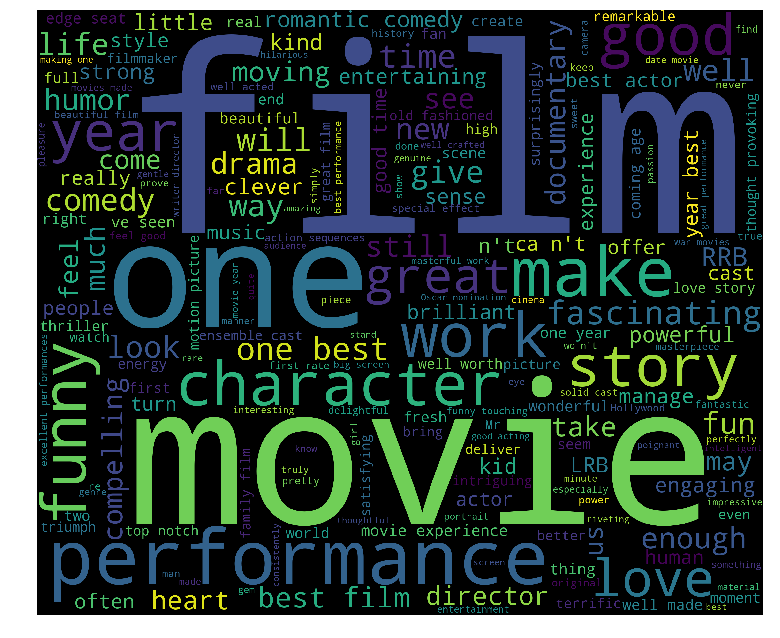

In [156]:
wordcloud(positive)

# somewhat Positive sentiment wordcloud

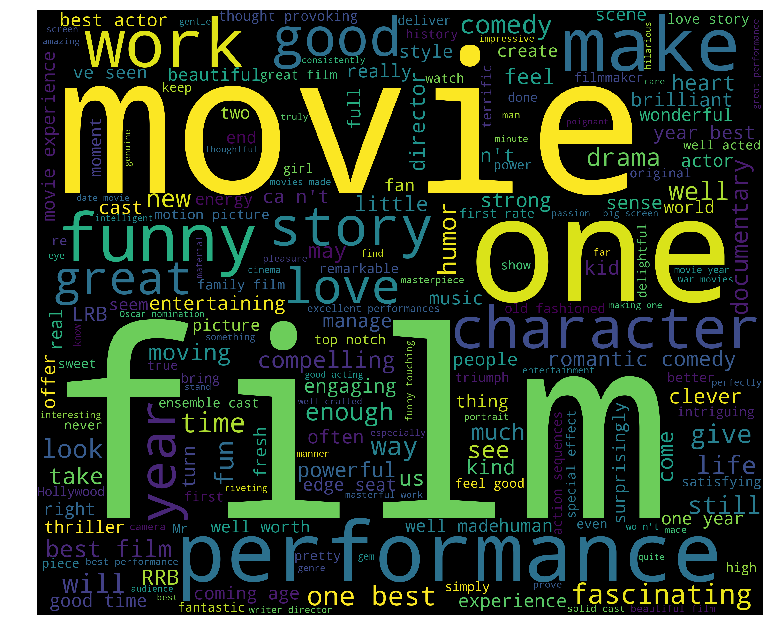

In [157]:
wordcloud(sw_positive)

# Neutral sentiment Word cloud

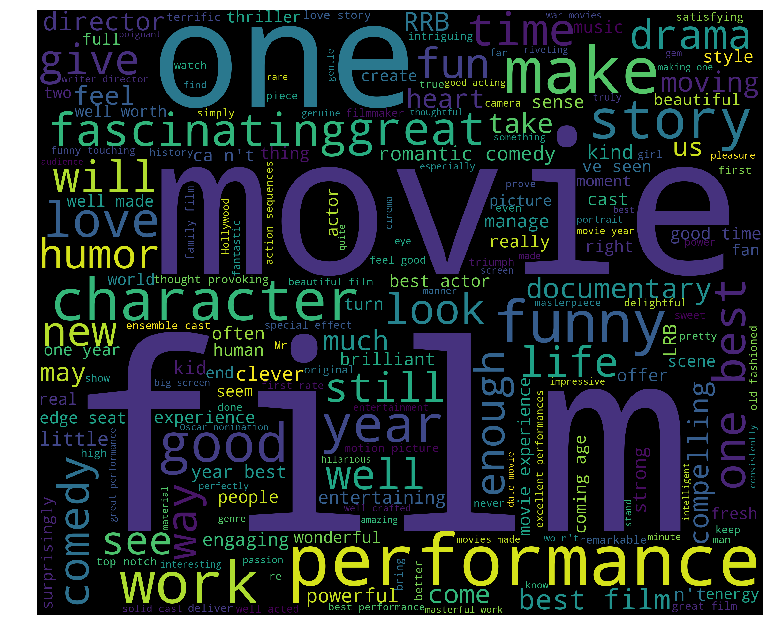

In [158]:
wordcloud(neutral)

#  some what negative sentiment Word cloud

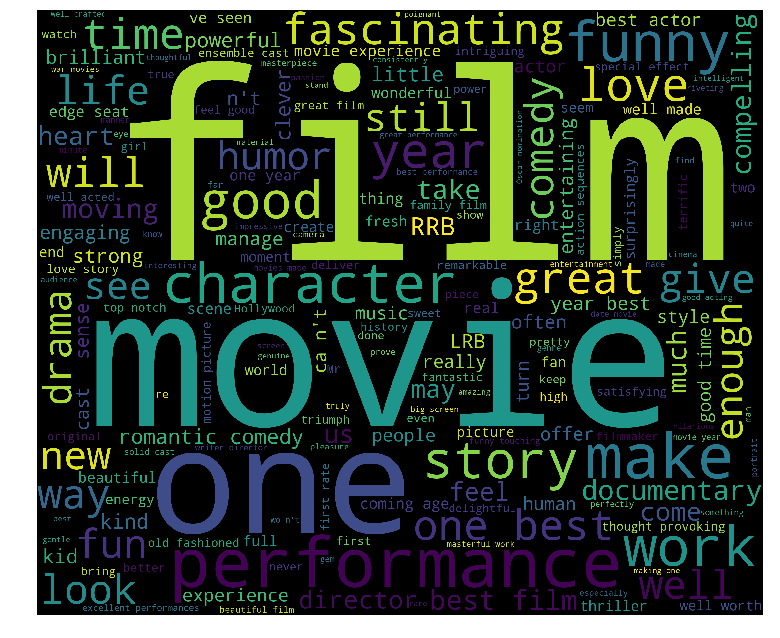

In [159]:
wordcloud(sw_negative)

# Negative sentiment Word cloud

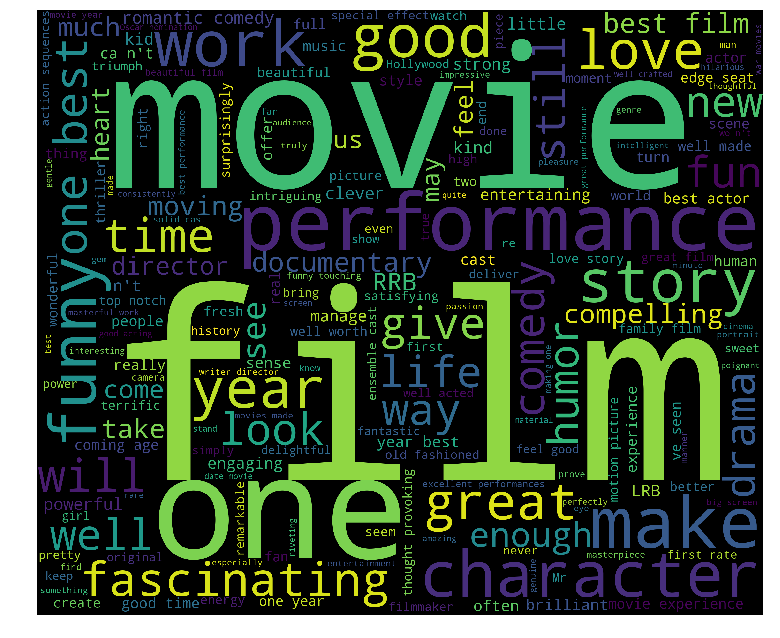

In [160]:
wordcloud(negative)

# Creating the Bag of Words model

In [161]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1500)
X = cv.fit_transform(corpus).toarray()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

# Test Train split

In [162]:

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)


In [163]:
#function to evaluate the performance of the prediction
#cm is to input the confusion matrix
def evaluate(cm):
    c_sum = 0
    w_sum = 0
    
    for i in range (0,5):
        for j in range (0,5):
            if(i==j):
                c_sum = c_sum+cm[i][j]
            else:
                w_sum = w_sum+cm[i][j]
    print('total no of reviews predicted = ',c_sum+w_sum)
    print('no of correct predictions = ',c_sum)
    print('no of wrong predictions = ',w_sum)
    print('accuracy = ', c_sum/(c_sum+w_sum))
    #return c_sum,w_sum,c_sum+w_sum

# Fitting and predicting with different classification models

## Decision Tree

In [164]:
#fitting the decision tree model 
from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier_dt.fit(X_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

In [166]:
# Predicting the Test set results
y_pred_dt = classifier_dt.predict(X_test)

In [167]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)

In [168]:
cm_dt

array([[  572,   540,   289,    33,     4],
       [  558,  2231,  2645,   175,    22],
       [  178,  1374, 13097,  1226,    74],
       [   23,   228,  2877,  2920,   552],
       [    8,    57,   927,   861,   650]])

In [169]:
evaluate(cm_dt)

total no of reviews predicted =  32121
no of correct predictions =  19470
no of wrong predictions =  12651
accuracy =  0.6061455122816849


In [170]:
# save the model to disk
import pickle
filename = 'rev2_dt_final.sav'
pickle.dump(classifier_dt, open(filename, 'wb'))
 


## multinomial Naive Bayes

In [172]:
#fitting the multinomial Naive Bayes model 
from sklearn.naive_bayes import MultinomialNB
classifier_mnb = MultinomialNB()
classifier_mnb.fit(X_train, y_train)
# Predicting the Test set results
y_pred_mnb = classifier_mnb.predict(X_test)
# Making the Confusion Matrix
cm_mnb = confusion_matrix(y_test, y_pred_mnb)

In [173]:
cm_mnb

array([[  192,   461,   725,    48,    12],
       [  136,  1202,  4005,   242,    46],
       [   31,   516, 14566,   743,    93],
       [   10,   169,  4007,  2008,   406],
       [    0,    51,  1258,   686,   508]])

In [174]:
evaluate(cm_dt)

total no of reviews predicted =  32121
no of correct predictions =  19470
no of wrong predictions =  12651
accuracy =  0.6061455122816849


In [175]:
# save the model to disk
import pickle
filename = 'rev2_mnb_final.sav'
pickle.dump(classifier_mnb, open(filename, 'wb'))
 


## KNN 

In [176]:
#fitting the KNN model 
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier_knn.fit(X_train, y_train)
# Predicting the Test set results
y_pred_knn = classifier_knn.predict(X_test)
# Making the Confusion Matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)

In [177]:
cm_knn

array([[  431,   525,   448,    32,     2],
       [  401,  1962,  3072,   180,    16],
       [  133,  1339, 13450,   973,    54],
       [   31,   330,  3505,  2405,   329],
       [    4,    94,  1203,   734,   468]])

In [178]:
evaluate(cm_knn)

total no of reviews predicted =  32121
no of correct predictions =  18716
no of wrong predictions =  13405
accuracy =  0.5826717723607608


In [179]:
# save the model to disk
import pickle
filename = 'rev2_knn_final.sav'
pickle.dump(classifier_knn, open(filename, 'wb'))
 


### KSVM


In [2]:
from sklearn.svm import SVC

In [ ]:
#fitting the KNN model 
from sklearn.neighbors import KNeighborsClassifier
classifier_svm = SVC(kernel = 'rbf', random_state = 0)
classifier_svm.fit(X_train, y_train)
# Predicting the Test set results
y_pred_svm = classifier_svm.predict(X_test)
# Making the Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)

In [ ]:
cm_svm

In [ ]:
evaluate(cm_knn)

In [ ]:
# save the model to disk
import pickle
filename = 'rev2_svm_final.sav'
pickle.dump(classifier_knn, open(filename, 'wb'))
 


## ensembling the 3 models by using majority vote

In [212]:
y_pred = y_pred_dt+y_pred_mnb+y_pred_knn

In [213]:
y_pred= y_pred/3

In [214]:
y_pred_ensemble = []
for i in y_pred:
   # print(i)
   # print(round(i,0))
    y_pred_ensemble.append(round(i,0))

In [215]:
y_pred_ensemble

[2.0,
 2.0,
 1.0,
 2.0,
 2.0,
 1.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 3.0,
 1.0,
 2.0,
 2.0,
 2.0,
 2.0,
 3.0,
 2.0,
 2.0,
 1.0,
 2.0,
 2.0,
 2.0,
 3.0,
 0.0,
 3.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 3.0,
 2.0,
 2.0,
 2.0,
 3.0,
 2.0,
 1.0,
 3.0,
 2.0,
 2.0,
 2.0,
 1.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 1.0,
 2.0,
 2.0,
 3.0,
 3.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 1.0,
 2.0,
 2.0,
 2.0,
 4.0,
 1.0,
 3.0,
 3.0,
 1.0,
 3.0,
 1.0,
 1.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 1.0,
 2.0,
 1.0,
 2.0,
 1.0,
 3.0,
 1.0,
 2.0,
 3.0,
 2.0,
 2.0,
 2.0,
 1.0,
 1.0,
 2.0,
 2.0,
 2.0,
 1.0,
 3.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 0.0,
 2.0,
 1.0,
 3.0,
 3.0,
 1.0,
 2.0,
 2.0,
 3.0,
 2.0,
 2.0,
 2.0,
 1.0,
 2.0,
 1.0,
 2.0,
 1.0,
 2.0,
 3.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 1.0,
 1.0,
 2.0,
 2.0,
 2.0,
 1.0,
 1.0,
 2.0,
 2.0,
 3.0,
 3.0,
 2.0,
 1.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 1.0,
 2.0,
 2.0,
 3.0,
 2.0

In [216]:
cm_e = confusion_matrix(y_test, y_pred_ensemble)

In [217]:
evaluate(cm_e)

total no of reviews predicted =  32121
no of correct predictions =  19571
no of wrong predictions =  12550
accuracy =  0.6092898726689705


### predicting outside data values

In [237]:

def convert_text_bow(text):
    review = clean(text)
    text_list = list()
    text_list.append(review)
    return cv.transform(text_list)

In [238]:
s = 'kabali is the best movie i have ever seen'

In [239]:
classifier_mnb.predict(convert_text_bow(s))

array([4], dtype=int64)

In [240]:
s = 'kabali is the worst movie i have ever seen'
classifier_mnb.predict(convert_text_bow(s))

array([0], dtype=int64)

In [244]:
s = 'kabali is ok'
classifier_mnb.predict(convert_text_bow(s))

array([2], dtype=int64)

In [252]:
s = 'kabali is good'
classifier_mnb.predict(convert_text_bow(s))

array([3], dtype=int64)

In [253]:
classifier_dt.predict(conver_text_bow(s))

array([3], dtype=int64)

In [258]:
## trying with the test data
test_dataset = pd.read_csv('test.tsv',delimiter='\t')

In [259]:
test_dataset.head()

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine


In [262]:
pid = np.array(test_dataset['PhraseId'].values)

In [264]:
test_data_X = np.array(test_dataset['Phrase'].values)

In [266]:
test_data_list = []
for i in test_data_X:
    test_data_list.append(conver_text_bow(str(i)))

In [272]:
test_data_pred_dt = []
for i in test_data_list:
    test_data_pred_dt.append(classifier_dt.predict(i))

In [273]:
test_data_pred_mnb = []

for i in test_data_list:
    test_data_pred_mnb.append(classifier_mnb.predict(i))

In [274]:
out_dt =np.column_stack((pid,test_data_pred_dt))

In [275]:
out_mnb =np.column_stack((pid,test_data_pred_mnb))

In [278]:
np.savetxt("out_dt.csv", out_dt, delimiter=",")

In [279]:
np.savetxt("out_mnb.csv", out_mnb, delimiter=",")